<hr/>

# Prediciendo la satisfacción del consumidor (OSAT) (Keras - Redes Neuronales Artificiales)
**Sara Domínguez Torres - Trabajo de Fin de Grado, Empresa y Tecnología (Universidad de Santiago de Compostela)**
<hr/>

<img src="imagen.jpeg" alt="imagen" width="1600" height="500">

<br>




<a id="ch1"></a>
## 1. PRIMER MODELO DE RED NEURONAL

---
Comenzamos programando un modelo de red simple con tres capas: 64 neuronas en la capa de entrada, 32 en la capa oculta y 1 en la de salida, ya que nos enfrentamos a un problema de predicción de un valor continuo en la escala del 1 al 7 (OSAT).

### PASO 1: IMPORTAMOS LAS LIBRERÍAS NECESARIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping




### PASO 2: LEEMOS Y PROCESAMOS EL DATASET

In [3]:
df = pd.read_excel('dataset_completo.xlsx')
X = df.iloc[:, 3:]  #Características (variables de entrada)
y = df['OSAT']  #Variable de salida

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X) #Estandarizamos los datos



### PASO 3: DIVIDIMOS EL CONJUNTO DE DATOS EN SUBCONJUNTOS DE ENTRENAMIENTO Y TEST

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### PASO 4: DEFINIMOS LA ARQUITECTURA DE LA RED NEURONAL (la más simple)

In [5]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Capa de salida para regresión lineal
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### PASO 5. ENTRENAMOS A LA RED

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4191 - mae: 3.0080 - mse: 13.4191 - val_loss: 1.0501 - val_mae: 0.7391 - val_mse: 1.0501
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9806 - mae: 0.7262 - mse: 0.9806 - val_loss: 0.9840 - val_mae: 0.7160 - val_mse: 0.9840
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9332 - mae: 0.7187 - mse: 0.9332 - val_loss: 0.9549 - val_mae: 0.7040 - val_mse: 0.9549
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9074 - mae: 0.7053 - mse: 0.9074 - val_loss: 0.9125 - val_mae: 0.7033 - val_mse: 0.9125
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8853 - mae: 0.7070 - mse: 0.8853 - val_loss: 0.9679 - val_mae: 0.7085 - val_mse: 0.9679
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8340 - mae: 0.6865 - mse: 0.8340 - val_loss: 1.1151 - val_mae: 0.8526 - val_mse: 1.1151
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0379 - mae: 0.7873 - mse: 1.0379 - val_

### PASO 6. HACEMOS LAS PREDICCIONES

In [7]:
test_predictions = model.predict(X_test).flatten()
print (test_predictions)

 1/27 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[ 5.637071    4.7578726   5.455093    5.9245095   4.9828515   4.0613213
  6.7512712   5.0115905   4.8889713   6.198476    4.973657    3.339032
  2.508872    6.840467    5.2969947   5.511416    5.4545      4.345991
  4.7005982   5.121348    5.4825687   4.839086    6.408326    5.8752475
  5.1237955   5.2700768   5.9083624   6.103317    4.6217713   5.945082
  6.3384547   5.5208917   4.301124    4.021257    6.1954827   5.7752547
  5.4752717   4.9500327   2.5544033   4.2592797   6.0550303   6.0229793
  5.9401717   6.368991    4.0608187   5.8531327   6.77248     1.8912953
  0.6026119   5.7999654   4.8688307   6.3209143   6.332976    4.8889713
  6.1339884   5.3473554   4.705051    5.5124097   3.8074245   7.394233
  4.883631    5.8346353   5.051764    5.412069    4.4603243   6.5509934
  4.1245785   1.247727    4.6309996   6.182505    6.9768887   4.2251687
  5.691545    4.267547    4.1255255   5.055118    6.0226846   5.2805448
  6.8303494   5.0294113   5.8

### PASO 7. CALCULAMOS LAS MÉTRICAS DE EVALUACIÓN Y GENERAMOS LOS GRÁFICOS

ERROR ABSOLUTO MEDIO (MAE):  0.7399650415611607
ERROR CUADRÁTICO (MSE):  1.0295602733389149
RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE):  1.0146724956058062
R2:  0.5098796825761401


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 590

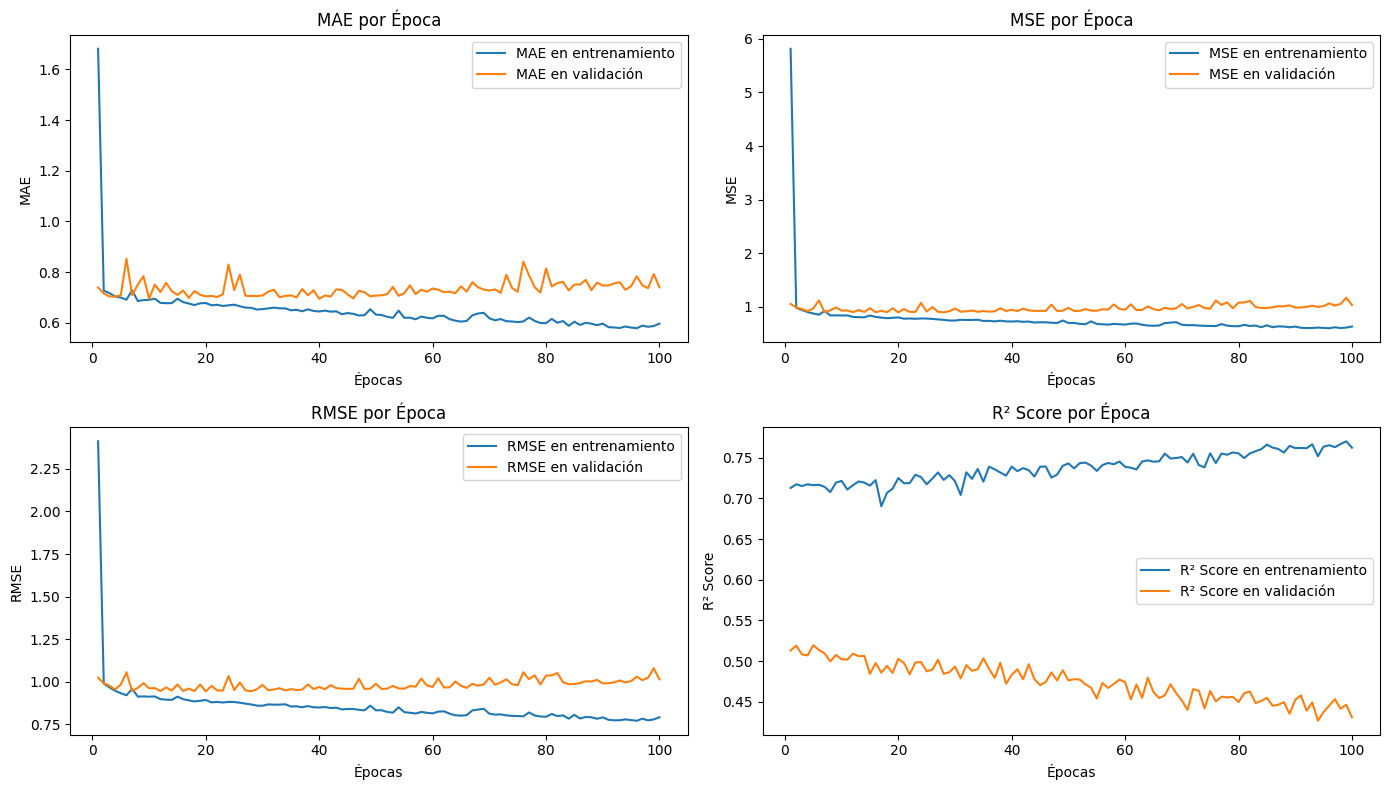

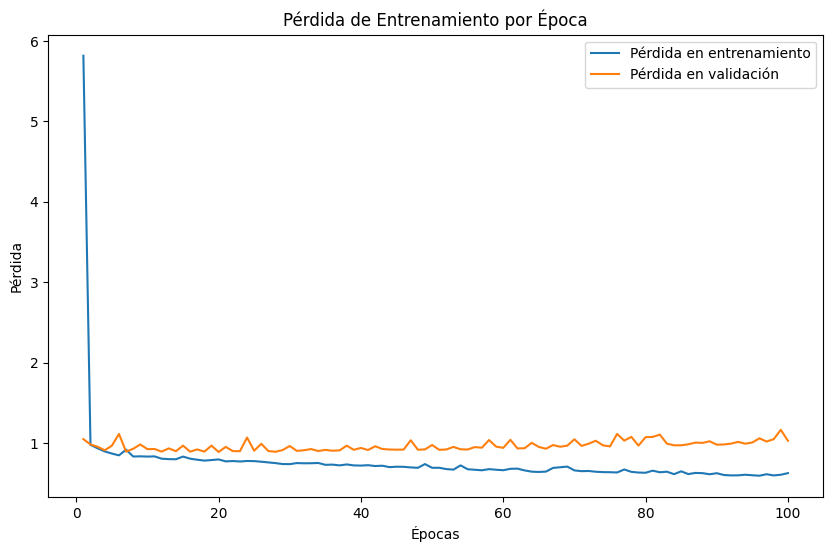

In [8]:
#MÉTRICAS DE EVALUACIÓN Y GRÁFICOS
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

print('ERROR ABSOLUTO MEDIO (MAE): ', mae)
print('ERROR CUADRÁTICO (MSE): ', mse)
print('RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE): ', rmse)
print('R2: ', r2)


#Gráficos de métricas por épocas
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(14, 8))

#MAE
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['mae'], label='MAE en entrenamiento')
plt.plot(epochs, history.history['val_mae'], label='MAE en validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE por Época')

#MSE
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['mse'], label='MSE en entrenamiento')
plt.plot(epochs, history.history['val_mse'], label='MSE en validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE por Época')

#RMSE
plt.subplot(2, 2, 3)
plt.plot(epochs, np.sqrt(history.history['mse']), label='RMSE en entrenamiento')
plt.plot(epochs, np.sqrt(history.history['val_mse']), label='RMSE en validación')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE por Época')


#R² Score (usando las predicciones para cada época)
r2_scores_train = []
r2_scores_val = []
for epoch in epochs:
    model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, pred_train))
    r2_scores_val.append(r2_score(y_test, pred_val))

plt.subplot(2, 2, 4)
plt.plot(epochs, r2_scores_train, label='R² Score en entrenamiento')
plt.plot(epochs, r2_scores_val, label='R² Score en validación')
plt.xlabel('Épocas')
plt.ylabel('R² Score')
plt.legend()
plt.title('R² Score por Época')

plt.tight_layout()
plt.show()


#Pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de Entrenamiento por Época')
plt.show()


<a id="ch2"></a>
## 2. OPTIMIZACIÓN DEL MODELO
<hr/>

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.8783 - mae: 2.7470 - mse: 10.8139 - val_loss: 2.5990 - val_mae: 1.0759 - val_mse: 1.6787
Epoch 2/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0406 - mae: 1.6282 - mse: 4.1486 - val_loss: 2.1707 - val_mae: 0.9368 - val_mse: 1.3450
Epoch 3/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3379 - mae: 1.5040 - mse: 3.5294 - val_loss: 2.2078 - val_mae: 0.9892 - val_mse: 1.4433
Epoch 4/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8844 - mae: 1.3981 - mse: 3.1330 - val_loss: 2.2590 - val_mae: 1.0349 - val_mse: 1.5442
Epoch 5/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9311 - mae: 1.4369 - mse: 3.2271 - val_loss: 2.1771 - val_mae: 1.0202 - val_mse: 1.5043
Epoch 6/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9861 - mae: 1.4742 - mse: 3.3229 - val_loss: 1.8533 - val_mae: 0.8952 - val_mse: 1.2148
Epoch 7/200
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5364 - mae: 1.3742 - mse: 2.9055 - val_lo

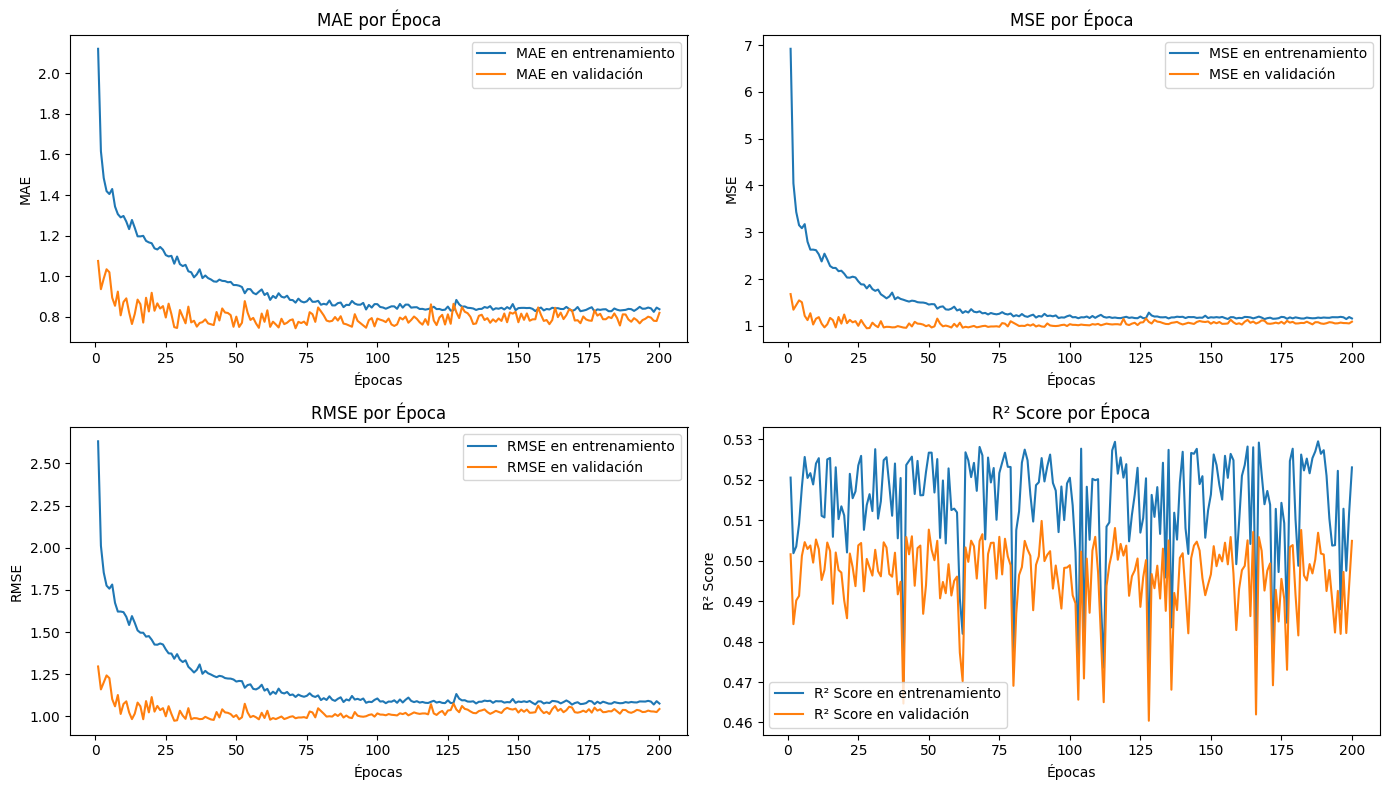

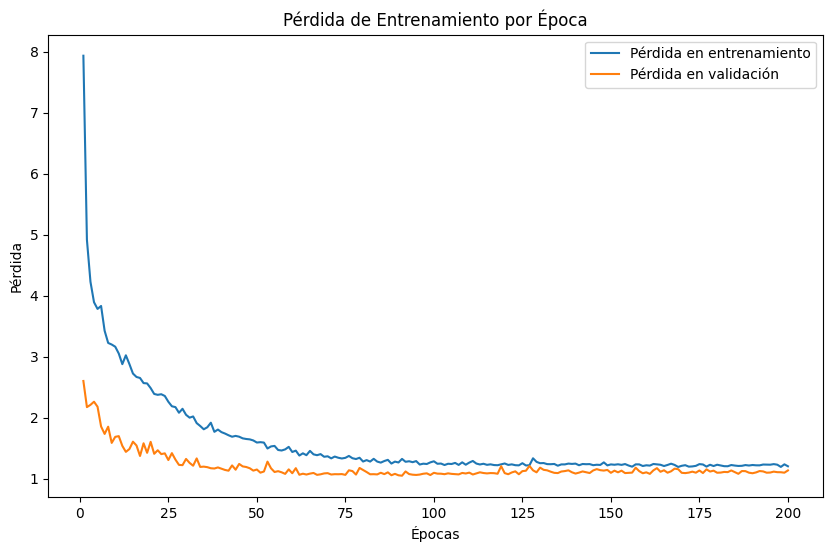

In [9]:

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3), 
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),  
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3), 
    Dense(1, activation='linear')  
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])


#Utilizamos la técnica de Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


#Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

#Hacemos las predicciones en el conjunto de prueba
test_predictions = model.predict(X_test).flatten()

#Métricas de evaluación
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)
print('Mean Absolute Error (MAE): ', mae)
print('Mean Squared Error (MSE): ', mse)
print('Root Mean Squared Error (RMSE): ', rmse)
print('R^2 Score: ', r2)


#Gráficos de métricas por épocas
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(14, 8))

#MAE
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['mae'], label='MAE en entrenamiento')
plt.plot(epochs, history.history['val_mae'], label='MAE en validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE por Época')

#MSE
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['mse'], label='MSE en entrenamiento')
plt.plot(epochs, history.history['val_mse'], label='MSE en validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE por Época')

# RMSE
plt.subplot(2, 2, 3)
plt.plot(epochs, np.sqrt(history.history['mse']), label='RMSE en entrenamiento')
plt.plot(epochs, np.sqrt(history.history['val_mse']), label='RMSE en validación')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE por Época')

#R² Score (usando las predicciones para cada época)
r2_scores_train = []
r2_scores_val = []
for epoch in epochs:
    model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, pred_train))
    r2_scores_val.append(r2_score(y_test, pred_val))

plt.subplot(2, 2, 4)
plt.plot(epochs, r2_scores_train, label='R² Score en entrenamiento')
plt.plot(epochs, r2_scores_val, label='R² Score en validación')
plt.xlabel('Épocas')
plt.ylabel('R² Score')
plt.legend()
plt.title('R² Score por Época')

plt.tight_layout()
plt.show()

#Pérdida (loss) durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de Entrenamiento por Época')
plt.show()




<a id="ch3"></a>
## 3. PRUEBA CON REGRESIÓN LINEAL
<hr/>

### PASO 2: DEFINIMOS EL MODELO DE REGRESIÓN

In [10]:
#Definimos y entrenamos del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Hacemos las predicciones
regression_predictions = model.predict(X_test)

ERROR ABSOLUTO MEDIO (MAE):  0.7110235641174016
ERROR CUADRÁTICO (MSE):  0.9018523657640309
RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE):  1.043579972365984
R2:  0.5706748024141942


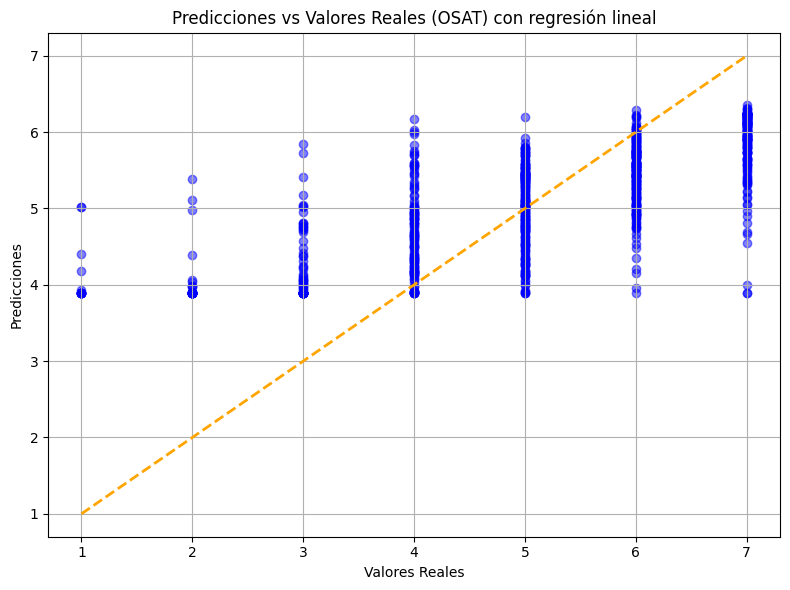

In [13]:

#Métricas de evaluación
mae3 = mean_absolute_error(y_test, regression_predictions)
mse3 = mean_squared_error(y_test, regression_predictions)
rmse3 = np.sqrt(mse)
r23 = r2_score(y_test, regression_predictions)

print('ERROR ABSOLUTO MEDIO (MAE): ', mae3)
print('ERROR CUADRÁTICO (MSE): ', mse3)
print('RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE): ', rmse3)
print('R2: ', r23)

#Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', linewidth=2)
plt.title('Predicciones vs Valores Reales (OSAT) con regresión lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.tight_layout()
plt.show()

